# Лабораторная работа 2: Предсказание возраста краба

## 1. Импорт библиотек

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import mean_squared_error


2. Загрузка и предобработка данных

In [3]:
# Загрузка данных
data = pd.read_csv("../data/crab_age/CrabAgePrediction.csv")

# Удаление пропусков
data = data.dropna()

# Разделение на признаки и целевую переменную
X = data.drop("Age", axis=1)  # Проверьте название столбца!
y = data["Age"]

# Кодирование категориальных признаков
X = pd.get_dummies(X, columns=["Sex"])

# Разделение на train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

3. Обучение и оценка моделей

3.1 Gradient Boosting

In [7]:
from sklearn.metrics import mean_squared_error
import numpy as np

rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))

print(f"Gradient Boosting RMSE: {rmse_gb:.2f}")

Gradient Boosting RMSE: 2.10


3.2 SVM

In [10]:
from sklearn.svm import SVR
# Обучение модели
svm_model = SVR(kernel='rbf', C=1.0)
svm_model.fit(X_train, y_train)
# Предсказание и оценка
y_pred_svm = svm_model.predict(X_test)
rmse_svm = np.sqrt(mean_squared_error(y_test, y_pred_svm))
print(f"SVM RMSE: {rmse_svm:.2f}")

SVM RMSE: 2.21


3.3 Bayesian Ridge

In [12]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import numpy as np

# Обучение модели
svm_model = SVR(kernel='rbf', C=1.0)
svm_model.fit(X_train, y_train)

# Предсказание
y_pred_svm = svm_model.predict(X_test)

# Расчет RMSE 
mse = mean_squared_error(y_test, y_pred_svm)
rmse_svm = np.sqrt(mse)
print(f"SVM RMSE: {rmse_svm:.2f}")


SVM RMSE: 2.21


4. Сравнение моделей

Сравнение моделей:
               Model      RMSE
0  Gradient Boosting  2.104225
1                SVM  2.206158
2     Bayesian Ridge  2.153211


<Figure size 1000x500 with 0 Axes>

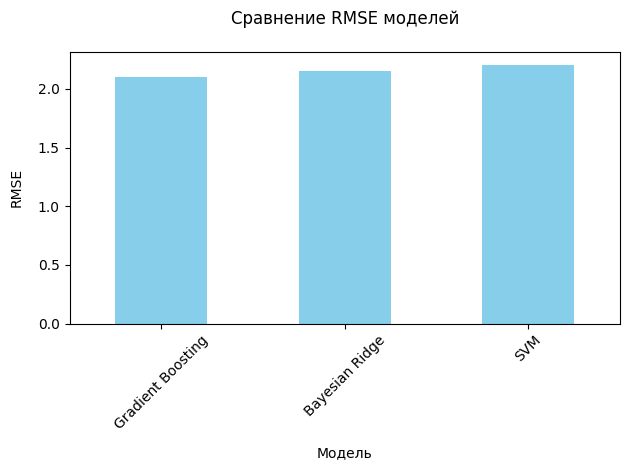

In [15]:
import os

# Создаем папку для результатов
os.makedirs("../results/crab_age", exist_ok=True)

# Создаем таблицу результатов
results = pd.DataFrame({
    'Model': ['Gradient Boosting', 'SVM', 'Bayesian Ridge'],
    'RMSE': [rmse_gb, rmse_svm, rmse_bayes]
})
print("Сравнение моделей:")
print(results)

# Строим график
plt.figure(figsize=(10, 5))
results.sort_values('RMSE').plot.bar(
    x='Model',
    y='RMSE',
    legend=False,
    color='skyblue'
)
plt.title('Сравнение RMSE моделей', pad=20)
plt.xlabel('Модель', labelpad=10)
plt.ylabel('RMSE', labelpad=10)
plt.xticks(rotation=45)
plt.tight_layout()

# Сохраняем график
plt.savefig("../results/crab_age/models_comparison.png", dpi=300, bbox_inches='tight')
plt.show()


5. Анализ модели

5.1 Важность признаков (Gradient Boosting)

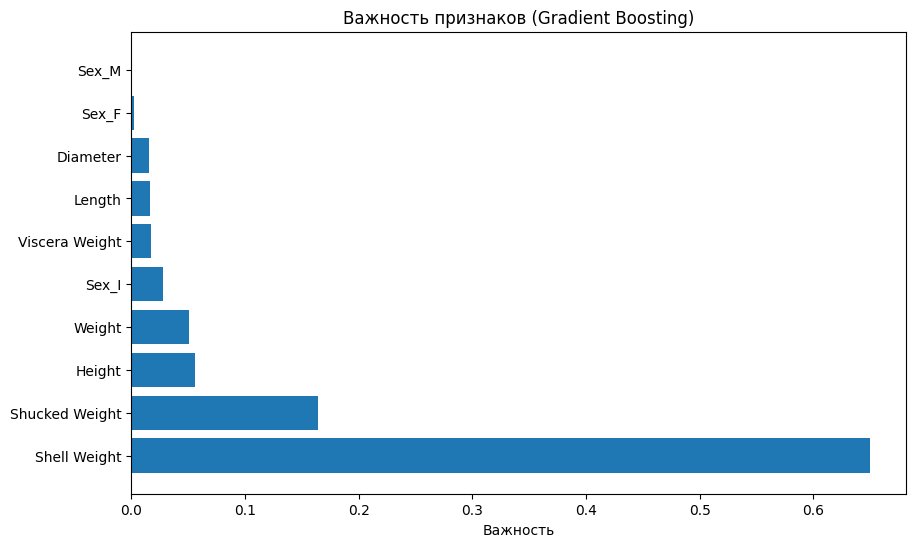

In [16]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': gb_model.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.title('Важность признаков (Gradient Boosting)')
plt.xlabel('Важность')
plt.savefig("../results/crab_age/feature_importance.png")
plt.show()

5.2 Кросс-валидация


In [17]:
scores = cross_val_score(gb_model, X, y, cv=5, scoring='neg_mean_squared_error')
rmse_cv = (-scores.mean())**0.5
print(f"Gradient Boosting RMSE с кросс-валидацией: {rmse_cv:.2f}")

Gradient Boosting RMSE с кросс-валидацией: 2.20


6. Визуализация предсказаний


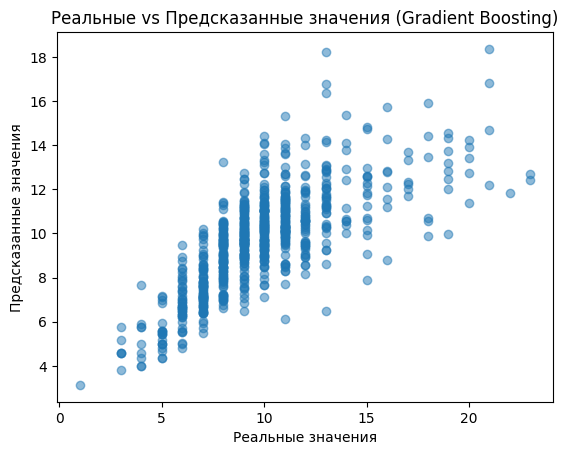

In [18]:
plt.scatter(y_test, y_pred_gb, alpha=0.5)
plt.xlabel("Реальные значения")
plt.ylabel("Предсказанные значения")
plt.title("Реальные vs Предсказанные значения (Gradient Boosting)")
plt.savefig("../results/crab_age/predictions.png")
plt.show()
